In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 导入数据
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
combine = [train_df, test_df]  #合并数据框

# describe()

In [3]:
## describe()
train_df.describe()  #无参数默认为numeric变量的描述
train_df.describe(include=['O'])  #describe(include=['O'])描述object类型的信息
#describe(include=['all'])描述所有类型的信息

#percentiles,这个参数可以设定数值型特征的统计量，默认是[.25, .5, .75]
train_df['Survived'].describe(percentiles=[0.61, 0.62])

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
61%        0.000000
62%        1.000000
max        1.000000
Name: Survived, dtype: float64

# groupby

In [4]:
## groupby
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

train_df.groupby('Sex')

得到了一个叫`DataFrameGroupBy`的东西,主要的功能能是允许你在不额外写循环的情况下, 快速对每一组数据进行操作.

## 基础操作

最基本的就是组内计数, 求和, 求均值, 求方差, 求blablabla...

In [5]:
train_df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

得到的是一个Series, 每一行对应了每一组的mean.

上面`age`是连续属性, 我们还可以操作离散属性, 比如对不同取值的计数:` .value_counts()`

In [6]:
train_df.groupby('Sex')['Embarked'].value_counts()

Sex     Embarked
female  S           203
        C            73
        Q            36
male    S           441
        C            95
        Q            41
Name: Embarked, dtype: int64

这时, 组内操作的结果不是单个值, 是一个序列, 我们可以用`.unstack()`将它展开

In [7]:
train_df.groupby('Sex')['Embarked'].value_counts().unstack()

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


- 首先通过groupby得到`DataFrameGroupBy`对象, 比如data.groupby('race')
- 然后选择需要研究的列, 比如`['age']`, 这样我们就得到了一个`SeriesGroupby`, 它代表每一个组都有一个`Series`
- 对`SeriesGroupby`进行操作, 比如`.mean()`, 相当于对每个组的`Series`求均值

如果不选列, 那么第三步的操作会遍历所有列, pandas会对能成功操作的列进行操作, 最后返回的一个由操作成功的列组成的`DataFrame`

## 可视化

<AxesSubplot:xlabel='Sex'>

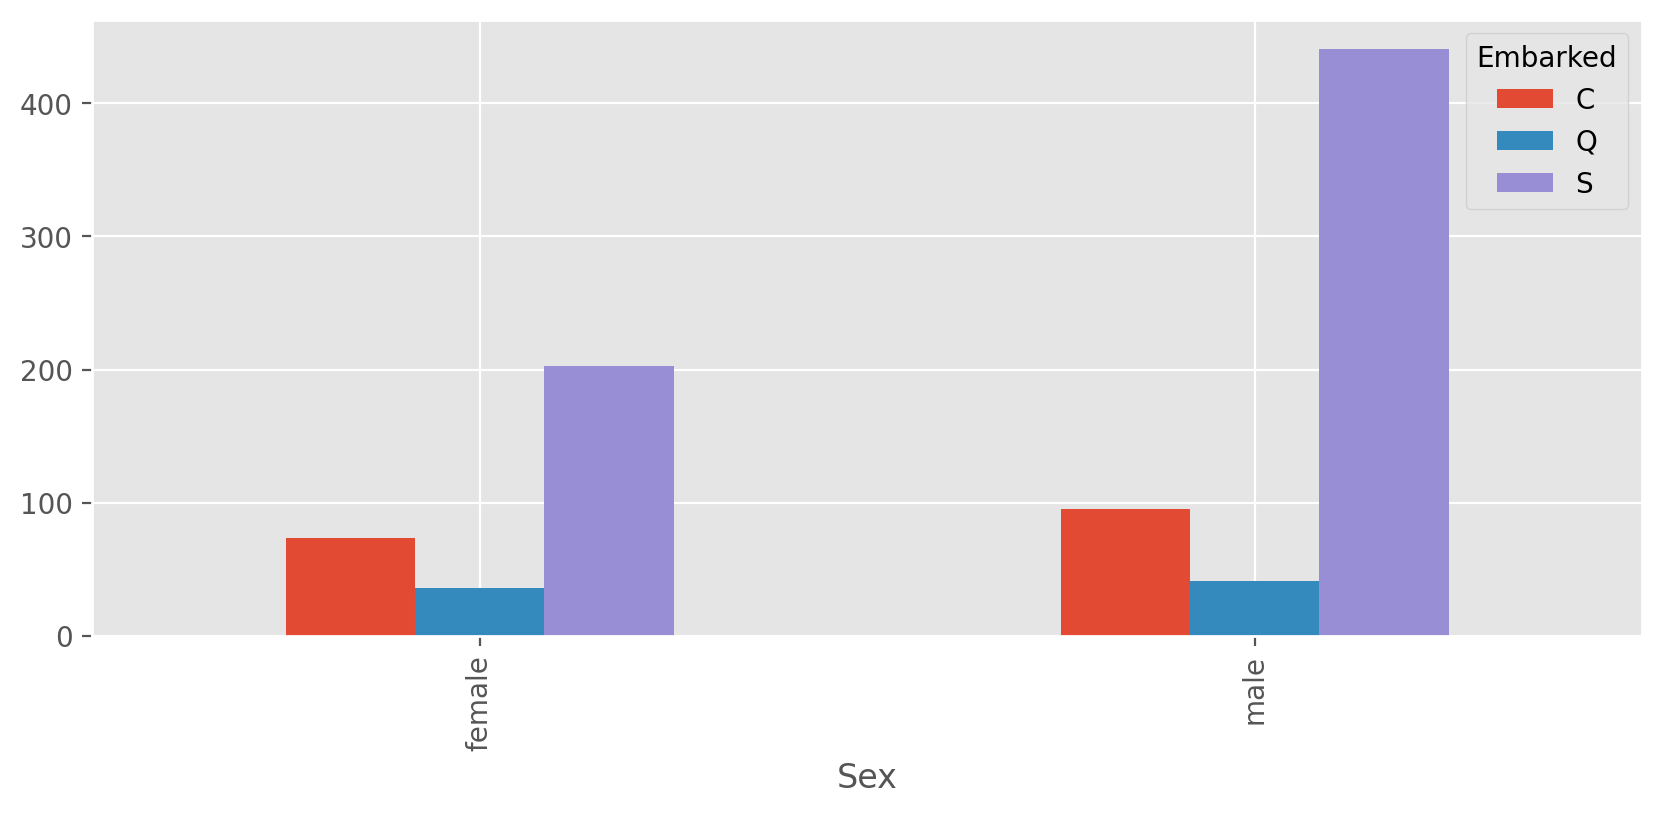

In [8]:
# 离散数据
train_df.groupby('Sex')['Embarked'].value_counts().unstack().plot(kind='bar',figsize=(10,4))

Sex
female    AxesSubplot(0.125,0.11;0.775x0.77)
male      AxesSubplot(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

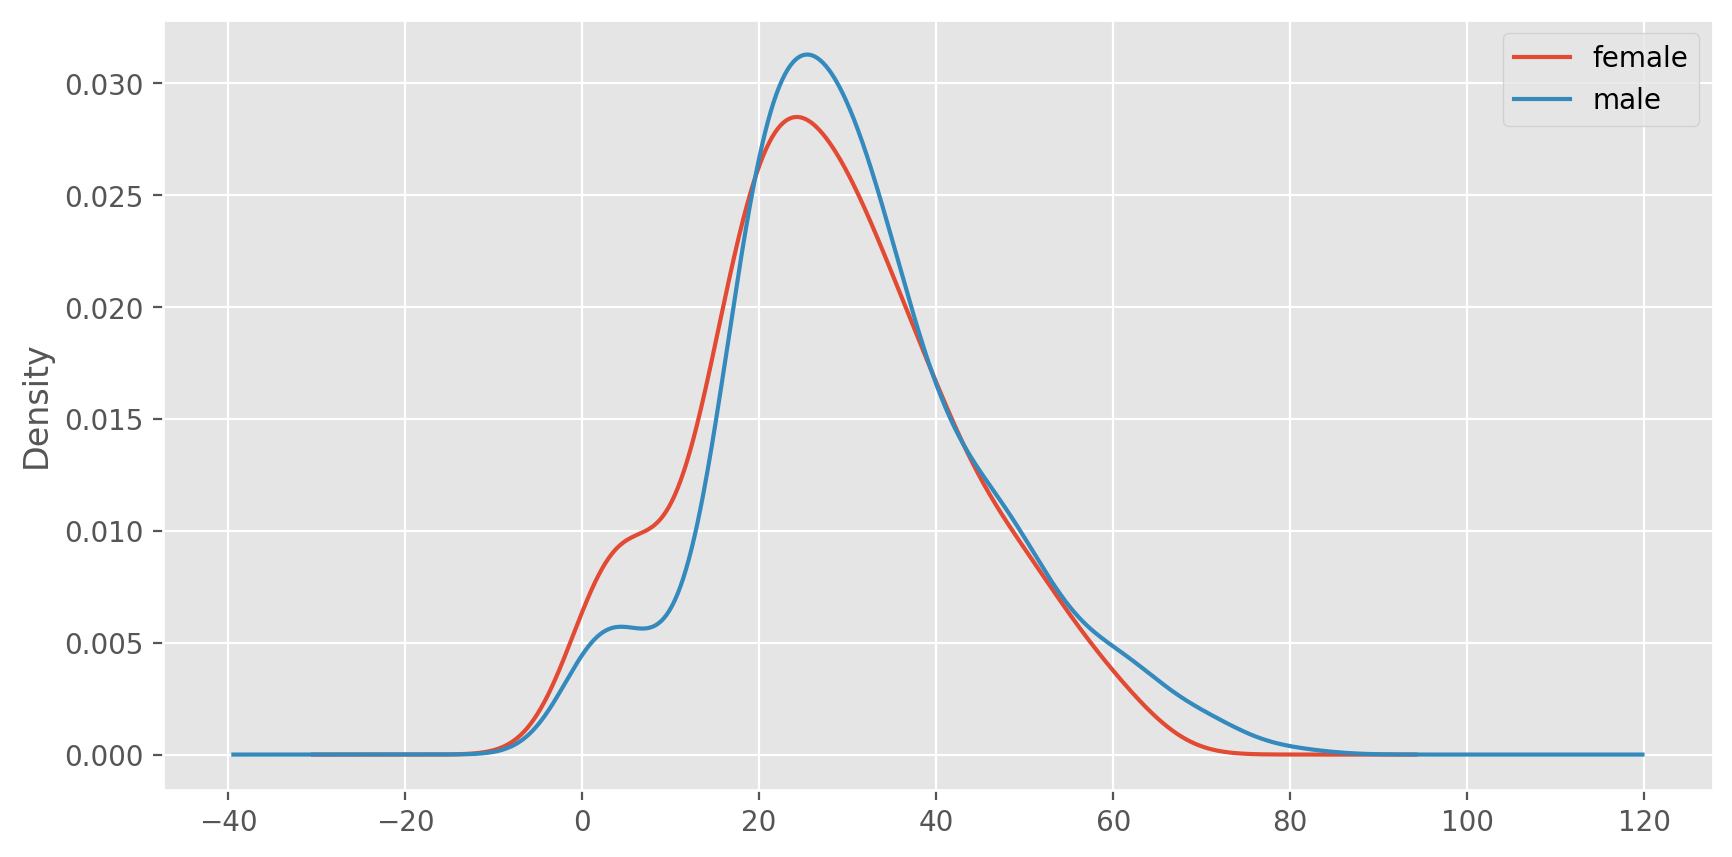

In [9]:
# 连续数据
train_df.groupby('Sex')['Age'].plot(kind='kde',legend=True, figsize=(10,5))  #kde为线性图

## 高级操作

- 有时我们需要对组内不同列采取不同的操作.

In [10]:
train_df.groupby('Sex').agg({'Age':np.median,'Fare':np.mean})

,Age,Fare
Sex,,
female,27.0,44.479818
male,29.0,25.523893


- 同时求不同组内, 年龄的均值, 中位数, 方差

In [11]:
train_df.groupby('Sex')['Age'].agg([np.mean, np.std])

,mean,std
Sex,,
female,27.915709,14.110146
male,30.726645,14.678201


- 结合上述两个场景

In [12]:
train_df.groupby('Sex').agg({'Age':[np.mean,np.std],'Fare':[np.mean,np.median]})

Age                  Fare       
             mean        std       mean median
Sex                                           
female  27.915709  14.110146  44.479818   23.0
male    30.726645  14.678201  25.523893   10.5

但是这里有一个问题, 这个列名分了很多层级, 我们可以进行重命名:

In [13]:
agg_df = train_df.groupby('Sex').agg({'Age':[np.mean,np.std],'Fare':[np.mean,np.median]})
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
agg_df

,Age_mean,Age_std,Fare_mean,Fare_median
Sex,,,,
female,27.915709,14.110146,44.479818,23.0
male,30.726645,14.678201,25.523893,10.5


# dataframe.agg()

DataFrame.agg(func, axis=0, *args, **kwargs)
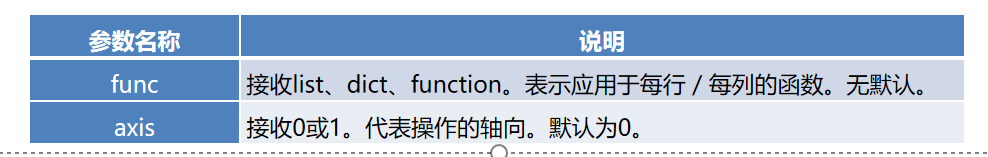

# 字符串相关

## .str.extract

将正则表达式中的提取为数据框中的列。

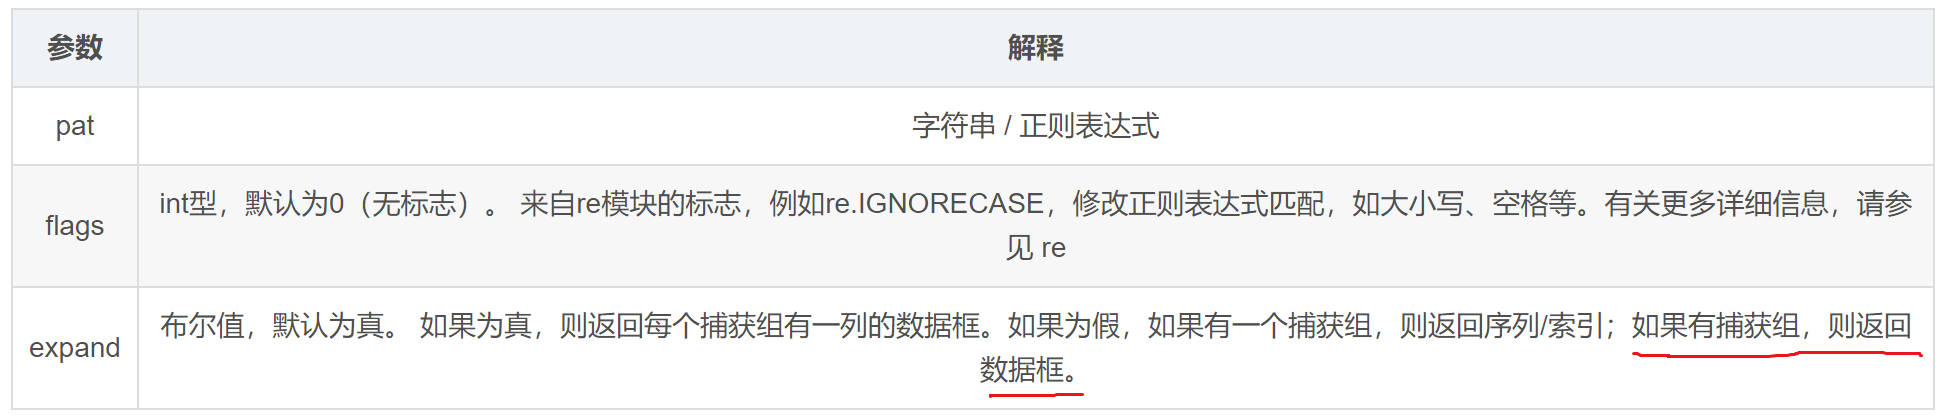

## 正则表达式语法

- `runoo+b`，可以匹配 runoob、runooob、runoooooob 等，+ 号代表前面的字符**必须至少出现一次（1次或多次）**
- `runoo*b`，可以匹配 runob、runoob、runoooooob 等，* 号代表前面的字符**可以不出现，也可以出现一次或者多次（0次、或1次、或多次）**。
- `colou?r` 可以匹配 color 或者 colour，? 问号代表前面的字符**最多只可以出现一次（0次或1次）**。
- `{n}`, n 是一个非负整数。匹配确定的 n 次。例如，`o{2}` 不能匹配 "Bob" 中的 o，但是能匹配 "food" 中的两个 o
- `{n,}`, n 是一个非负整数。**至少匹配n 次**。例如，`o{2,}` 不能匹配 "Bob" 中的 o，但能匹配 "foooood" 中的所有 o。`o{1,}` 等价于 `o+`。`o{0,}` 则等价于 `o*`。
- `[^...]`，匹配除了 [...] 中字符的所有字符，例如 `[^aeiou]` 匹配字符串 "google runoob taobao" 中除了 e o u a 字母的所有字母。
- `.`, 匹配除换行符（\n、\r）之外的任何单个字符，相等于 `[^\n\r]`
- `[\s\S]`, 匹配所有。\s 是匹配所有空白符，包括换行，\S 非空白符，不包括换行。
- `特殊字符`，就是一些有特殊含义的字符，如 runoo*b 中的 `*`，简单的说就是表示任何字符串的意思。如果要查找字符串中的 `*` 符号，则需要对 `* `进行转义，即在其前加一个 `\`，`runo\*ob` 匹配字符串 `runo*ob`

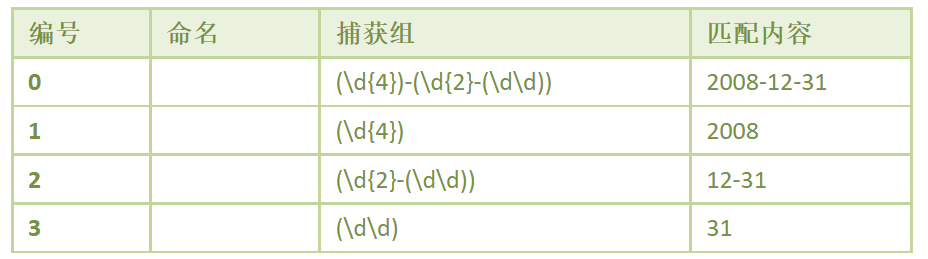

具体查看https://www.runoob.com/regexp/regexp-syntax.html

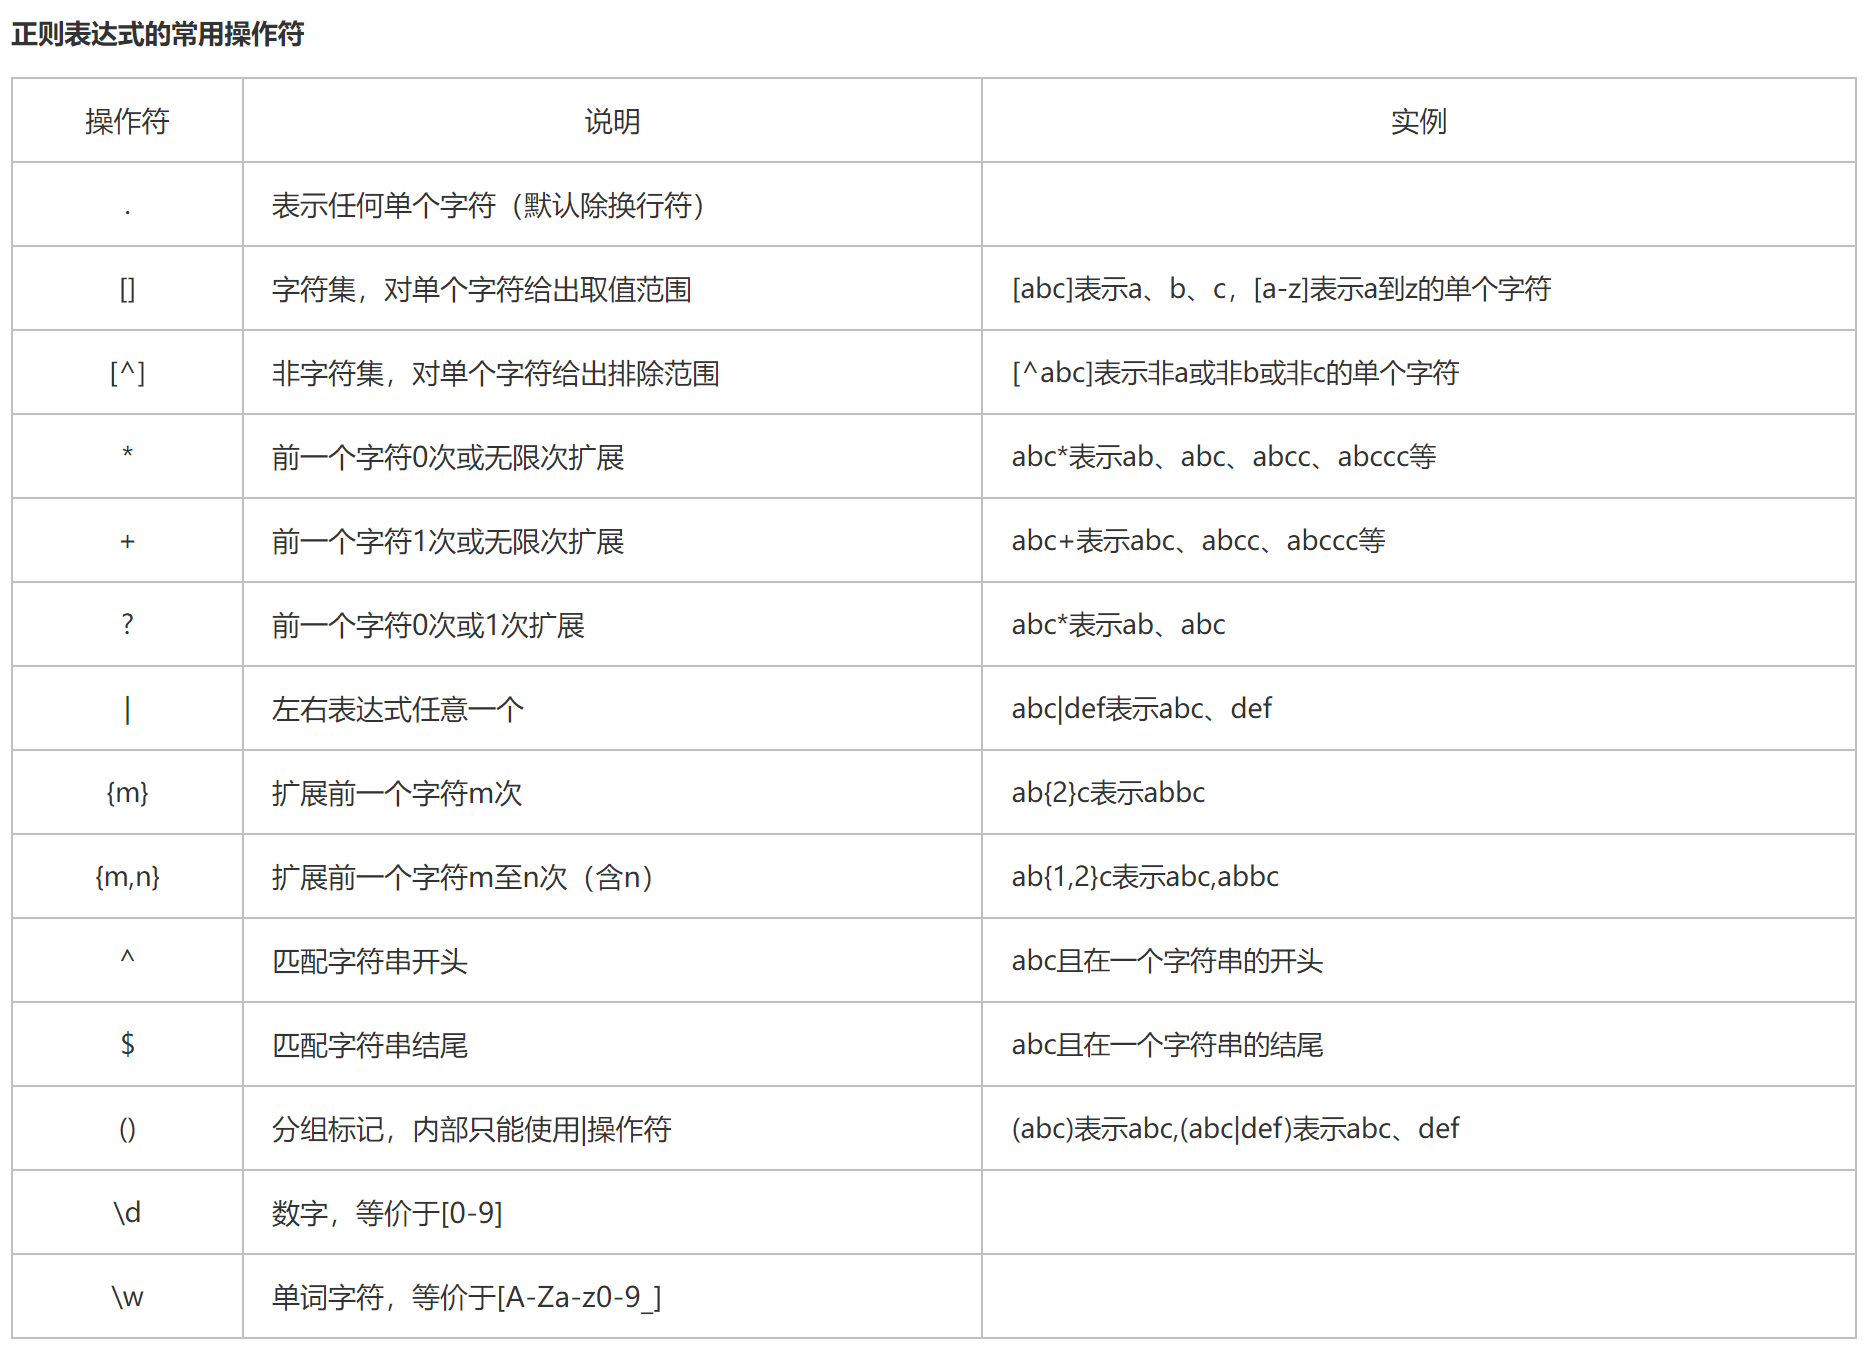

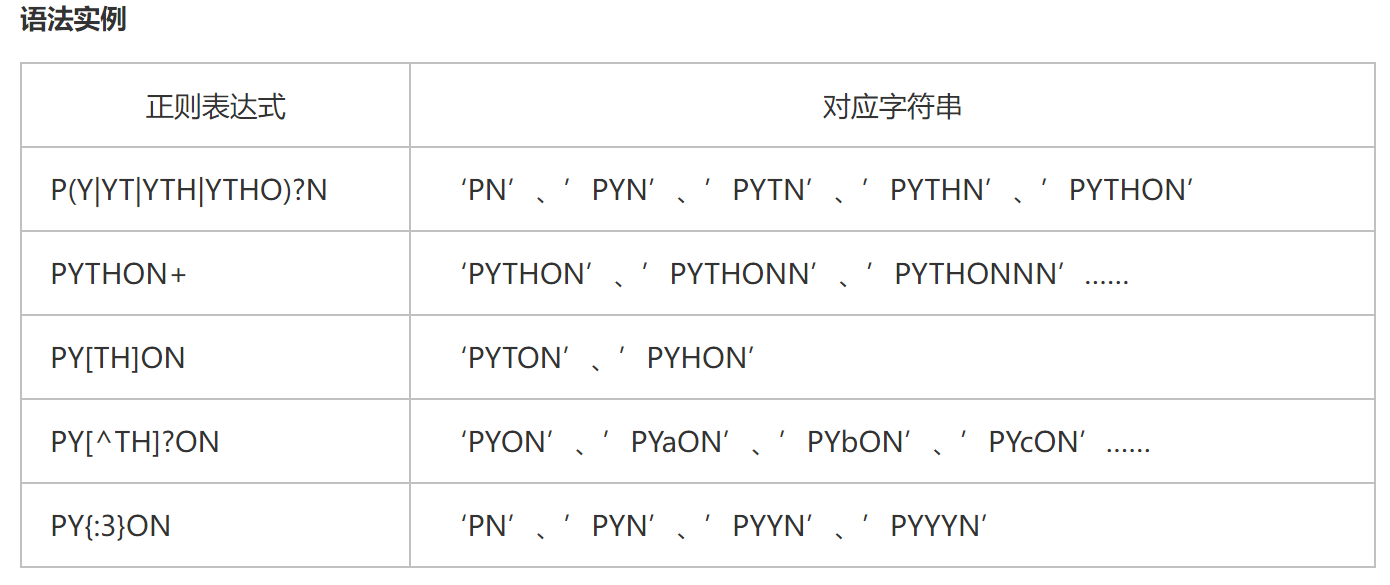

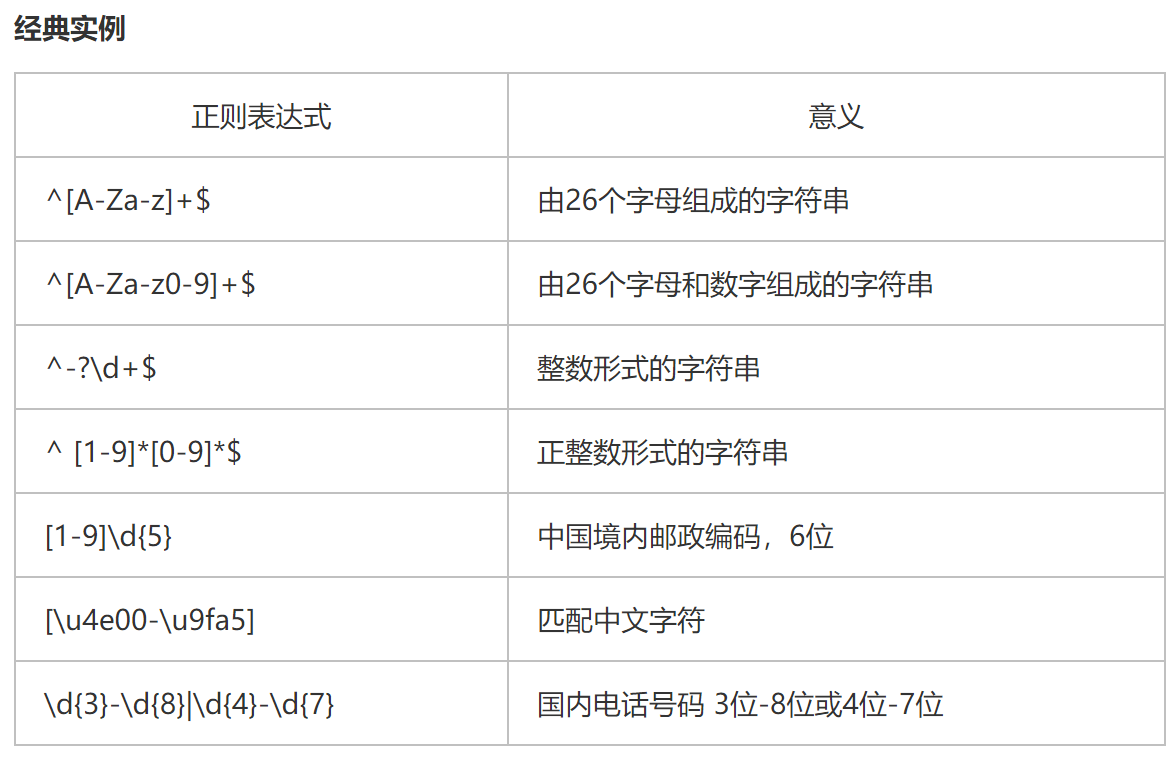

## re库

具体内容详见https://www.cnblogs.com/huskysir/p/12467491.html

Re库是Python的标准库，主要用于字符串匹配，调用方法`import re`

Re库采用raw string(原生字符串类型)表达正则表达式，表示为r'text'，raw string是不包含转义符的字符串

如 `r'[1-9]\d{5}'、r'\d{3}-\d{8}|\d{4}-\d{7}'`

string类型更繁琐，需要对一些特殊符号进行转义

如 `'[1-9]\\d{5}'、'\\d{3}-\\d{8}|\\d{4}-\\d{7}'` 

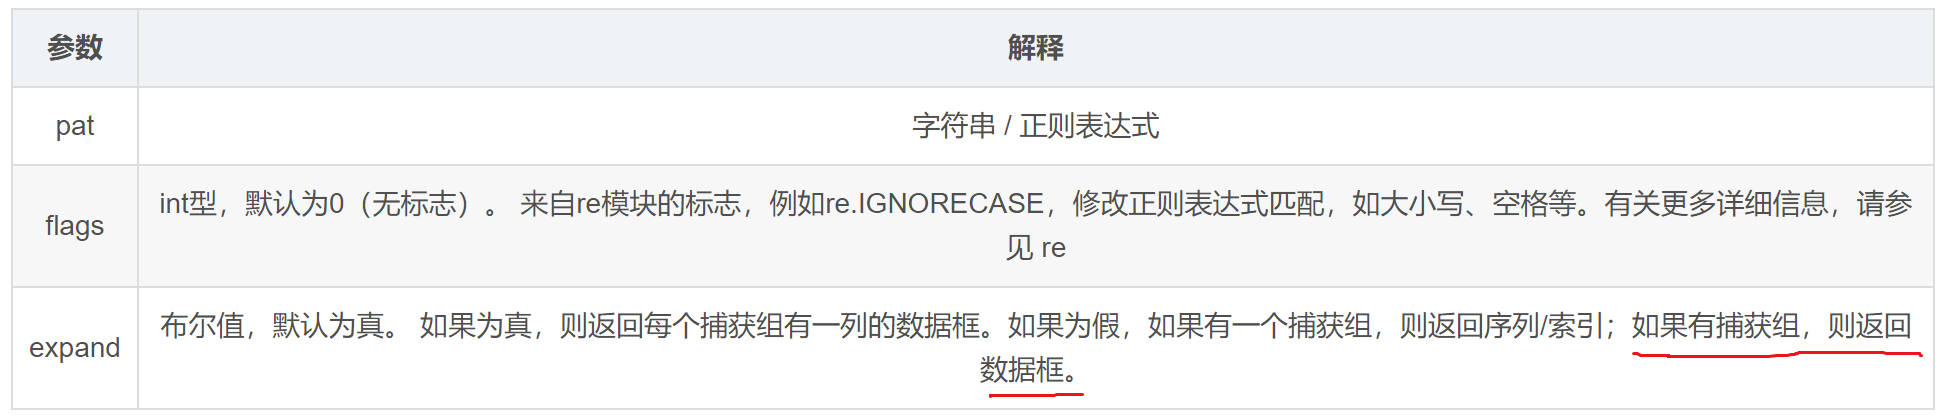

## str.split()

`split()` 通过指定分隔符对字符串进行切片，如果参数` num` 有指定值，则分隔 num+1 个子字符串

`str.split(str="", num=string.count(str)).`

- `str `-- 分隔符，默认为所有的空字符，包括空格、换行(\n)、制表符(\t)等。
- `num` -- 分割次数。默认为 -1, 即分隔所有。

In [9]:
str = "Line1-abcdef \nLine2-abc \nLine4-abcd"
str.split()     # 以空格为分隔符，包含 \n

['Line1-abcdef', 'Line2-abc', 'Line4-abcd']

In [13]:
str.split(' ', 1 )# 以空格为分隔符，分隔成两个

['Line1-abcdef', '\nLine2-abc \nLine4-abcd']

In [14]:
txt = "Google#Runoob#Taobao#Facebook"
txt.split("#", 1)

['Google', 'Runoob#Taobao#Facebook']

## strip函数

`strip() `方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。注意：该方法只能删除开头或是结尾的字符，不能删除中间部分的字符。

`str.strip([chars]);`

- `chars` -- 移除字符串头尾指定的字符序列。

In [15]:
str = "00000003210Runoob01230000000"; 
str.strip( '0' ) # 去除首尾字符 0

'3210Runoob0123'

In [16]:
# 只要头尾包含有指定字符序列中的字符就删除
str = "123abcrunoob321"
str.strip( '12' )   # 字符序列为 12

'3abcrunoob3'

# map函数

`map()` 会根据提供的函数对指定序列做映射。第一个参数` function `以参数序列中的每一个元素调用 `function `函数，返回包含每次 `function` 函数返回值的新列表。

In [14]:
def square(x):
    return x**2
map(square,[1,2,3,4,5])  #返回迭代器
# 使用 list() 转换为列表
list(map(square, [1,2,3,4,5]))
list(map(lambda x: x ** 2, [1, 2, 3, 4, 5]))

[1, 4, 9, 16, 25]

# loc与iloc

- loc works on **labels** in the index.
- iloc works on the positions in the index (只接受整数作为参数).

`loc`为Selection by Label函数，即为按标签取数据

`iloc`函数为Selection by Position，即按位置选择数据，即第n行，第n列数据，只接受整型参数

In [15]:
train_df.loc[:,'Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

# 数据分箱cut/qcut

Pandas 包中的 `cut` 和 `qcut` 都可以实现分箱操作，区别在于：

- `cut`：按照数值进行分割，等间隔
- `qcut`：按照数据分布进行分割，等频率

## cut()

Pandas cut()函数用于将数组元素分成不同的箱。 cut函数主要用于对标量数据进行统计分析

`cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates=”raise”,)`

- x:要合并的输入数组。必须为一维。
- bins：定义分割的bin边。
- right ：(布尔值，默认为True)指示箱子是否包括最右边。如果right == True(默认值)，则箱子[1、2、3、4]表示(1,2]，(2,3]，(3,4]。
- labels: (数组或布尔值，可选)指定返回的容器的标签。必须与生成的箱子长度相同。如果为False，则仅返回箱子的整数指示符。
- retbins ：(布尔型，默认为False)是否返回箱子。当垃圾桶作为标量提供时很有用。

In [16]:
df = pd.DataFrame({'number':np.random.randint(1, 100, 10)}) 
df['bins'] = pd.cut(x=df['number'], bins=[1, 20, 40, 60, 80, 100], 
                    labels=['1 to 20', '21 to 40', '41 to 60', 
                            '61 to 80', '81 to 100']) 
df

,number,bins
0,97,81 to 100
1,66,61 to 80
2,82,81 to 100
3,30,21 to 40
4,98,81 to 100
5,8,1 to 20
6,76,61 to 80
7,52,41 to 60
8,14,1 to 20
9,55,41 to 60


## qcut()

`pd.qcut` 实现按数据的数量进行分割，尽量保证每个分组里变量的个数相同。

`pandas.qcut(x(数组), q(组数，int), labels=None（标签）, retbins=False（是否返回边界值）, precision=3（精度）, duplicates='raise')`

In [17]:
import pandas as pd
d = pd.DataFrame([x**2 for x in range(11)],
             columns=['number'])
display(d)

,number
0,0
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64
9,81


In [18]:
# cut：按照数据值由小到大的顺序将数据分成4份， 并且使每组值的范围大致相等。
d_cut = d.copy()
d_cut['cut_group'] =pd.cut(d_cut['number'], 4)
d_cut

,number,cut_group
0,0,"(-0.1, 25.0]"
1,1,"(-0.1, 25.0]"
2,4,"(-0.1, 25.0]"
3,9,"(-0.1, 25.0]"
4,16,"(-0.1, 25.0]"
5,25,"(-0.1, 25.0]"
6,36,"(25.0, 50.0]"
7,49,"(25.0, 50.0]"
8,64,"(50.0, 75.0]"
9,81,"(75.0, 100.0]"


In [19]:
# 查看每个分组里变量的个数
d_cut['cut_group'].value_counts()

(-0.1, 25.0]     6
(25.0, 50.0]     2
(75.0, 100.0]    2
(50.0, 75.0]     1
Name: cut_group, dtype: int64

可以看到，每个分组里数据的个数并不一样。

如果希望每个分组里的数据个数一样，我们就要用到了qcut方法。

In [20]:
# 把变量由小到大分成四组，并且让每组变量的数量相同
d_qcut = d.copy()
d_qcut['qcut_group'] = pd.qcut(d_qcut['number'], 4)
d_qcut

,number,qcut_group
0,0,"(-0.001, 6.5]"
1,1,"(-0.001, 6.5]"
2,4,"(-0.001, 6.5]"
3,9,"(6.5, 25.0]"
4,16,"(6.5, 25.0]"
5,25,"(6.5, 25.0]"
6,36,"(25.0, 56.5]"
7,49,"(25.0, 56.5]"
8,64,"(56.5, 100.0]"
9,81,"(56.5, 100.0]"


In [21]:
# 查看每个分组里变量的个数
d_qcut['qcut_group'].value_counts()

(-0.001, 6.5]    3
(6.5, 25.0]      3
(56.5, 100.0]    3
(25.0, 56.5]     2
Name: qcut_group, dtype: int64

In [22]:
# 自定义分组标签的内容
d_qcut = d.copy()
d_qcut['qcut_group'] = pd.qcut(d_qcut['number'], 4,
                                          labels=['A', 'B', 'C', 'D'])
d_qcut

,number,qcut_group
0,0,A
1,1,A
2,4,A
3,9,B
4,16,B
5,25,B
6,36,C
7,49,C
8,64,D
9,81,D


# fillna()

函数形式：`fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, kwargs)`

参数：

- value：用于填充的空值的值。

- method： {'backfill', 'bfill', 'pad', 'ffill', None}, default None。定义了填充空值的方法， pad / ffill表示用前面行/列的值，填充当前行/列的空值， backfill / bfill表示用后面行/列的值，填充当前行/列的空值。

- axis：轴。0或'index'，表示按行删除；1或'columns'，表示按列删除。

- inplace：是否原地替换。布尔值，默认为False。如果为True，则在原DataFrame上进行操作，返回值为None。

-limit：int， default None。如果method被指定，对于连续的空值，这段连续区域，最多填充前 limit 个空值（如果存在多段连续区域，每段最多填充前 limit 个空值）。如果method未被指定， 在该axis下，最多填充前 limit 个空值（不论空值连续区间是否间断）

- downcast：dict, default is None，字典中的项为，为类型向下转换规则。或者为字符串“infer”，此时会在合适的等价类型之间进行向下转换，比如float64 to int64 if possible。


In [23]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
index = [2, 3, 6]
 
new_a = np.delete(a, index)
print(new_a) #Prints `[1, 2, 5, 6, 8, 9]`

[1 2 5 6 8 9]


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],
              [1, 2],[3, 4], [1, 2], [3, 4]])#训练数据集8*2
y = np.array([0, 0, 1, 1,0,0,1,1])#类别数据集8*1

ss=StratifiedShuffleSplit(n_splits=5,test_size=0.25,train_size=0.75,random_state=0)#分成5组，测试比例为0.25，训练比例是0.75

for train_index, test_index in ss.split(X, y):
   print("TRAIN:", train_index, "TEST:", test_index)#获得索引值
   X_train, X_test = X[train_index], X[test_index]#训练集对应的值
   y_train, y_test = y[train_index], y[test_index]#类别集对应的值

TRAIN: [5 2 6 4 1 3] TEST: [7 0]
TRAIN: [4 3 5 2 7 1] TEST: [6 0]
TRAIN: [7 1 6 2 0 4] TEST: [5 3]
TRAIN: [3 6 4 7 0 5] TEST: [1 2]
TRAIN: [3 4 1 7 2 0] TEST: [6 5]


# ravel()

ravel()方法将数组维度拉成一维数组

In [27]:
import numpy as np #导入numpy模块
 
a, b = np.mgrid[1:4:1, 2:3:1] #用mgrid()方法生成等差数组a,b

print("a:",a,"\n","b:",b) #打印a,b
 
Aftera = a.ravel() #用ravel()方法将数组a拉成一维数组
 
print("Aftera:",Aftera) #打印a

a: [[1]
 [2]
 [3]] 
 b: [[2]
 [2]
 [2]]
Aftera: [1 2 3]


# enumerate()

enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。

In [61]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons))

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

In [62]:
list(enumerate(seasons, start=1))       # 下标从 1 开始

[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]

In [65]:
seq = ['one', 'two', 'three']
for i, element in enumerate(seq):
    print(i, element)

0 one
1 two
2 three


# Numpy
## numpy.random.randint

返回一个随机整型数，范围从低（包括）到高（不包括），即`[low, high)`。

如果没有写参数high的值，则返回`[0,low)`的值。

`numpy.random.randint(low, high=None, size=None, dtype='l')`

## numpy.delete

numpy.delete(arr,obj,axis=None)

- arr:输入向量

- obj:表明哪一个子向量应该被移除。可以为整数或一个int型的向量

- axis:表明删除哪个轴的子向量，若默认，则返回一个被拉平的向量

# Pandas

## pd.concat

将数据根据不同的轴作简单的融合

`pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
       keys=None, levels=None, names=None, verify_integrity=False)`
       
参数说明 
- `objs`: series，dataframe或者是panel构成的序列lsit 
- `axis`： 需要合并链接的轴，0是行，1是列 当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并
- `join`：连接的方式 inner，或者outer 如果为’inner’得到的是两表的交集，如果是outer，得到的是两表的并集

具体详见https://www.cnblogs.com/RB26DETT/p/11555099.html

## pd.reset_index

函数作用：重置索引或其level。重置数据帧的索引，并使用默认索引。如果数据帧具有多重索引，则此方法可以删除一个或多个level。

函数主要有以下几个参数：`reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')`

各个参数介绍：

- `level`：可以是int, str, tuple, or list, default None等类型。作用是只从索引中删除给定级别。默认情况下删除所有级别。

- `drop`：bool, default False。不要尝试在数据帧列中插入索引。这会将索引重置为默认的整数索引。

-`inplace`：bool, default False。修改数据帧（不要创建新对象）。

- `col_level`：int or str, default=0。如果列有多个级别，则确定将标签插入到哪个级别。默认情况下，它将插入到第一层。

- `col_fill`：object, default。如果列有多个级别，则确定其他级别的命名方式。如果没有，则复制索引名称。

返回：DataFrame or None。具有新索引的数据帧，如果inplace=True，则无索引。

In [37]:
df = pd.DataFrame([('bird', 389.0),
 
                   ('bird', 24.0),
 
                   ('mammal', 80.5),
 
                   ('mammal', np.nan)],
 
                  index=['falcon', 'parrot', 'lion', 'monkey'],
 
                  columns=('class', 'max_speed'))
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [38]:
#重置索引时，将旧索引添加为列，并使用新的顺序索引：
df.reset_index()

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [39]:
#我们可以使用drop参数来避免将旧索引添加为列：
df.reset_index(drop=True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


## sort_values()

`DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)`

- `by`:要排序的名称或名称列表。(如果轴为 0 或“索引”，则 by 可能包含索引级别或列标签。如果轴为 1 或“列”，则 by 可能包含列级别或索引标签。
- `axis`:要排序的轴。若axis=0或'index'，则按照指定列中数据大小排序；若axis=1或'columns'，则按照指定索引中数据大小排序，默认axis=0
- `ascending`:bool或bool的列表，默认为True，即为升序排列。 为多个排序顺序指定列表。如果这是一个布尔值列表，则必须匹配by的长度。
- `inplace`：是否用排序后的数据集替换原来的数据，默认为False，即不替换。
- `kind`： 排序算法的选择。对于DataFrames，此选项仅在对单个列或标签排序时应用。{‘quicksort’, ‘mergesort’, ‘heapsort’}，默认是使用‘quicksort’
- `na_position`：如果是第一个，则将NaNs放在开头;如果是最后一个，把NaNs放在最后。
- `ignore_index`:如果为True，则结果轴将被标记为0,1，n - 1。
- `key`:在排序之前对值应用键函数。这类似于内置sorted()函数中的key参数，显著的区别是这个key函数应该是向量化的。它应该期望一个Series，并返回一个与输入具有相同形状的Series。它将被独立地应用到每一列。      


## 数据堆叠——stack,unstack,reshape

- `stack` —— 将数据从”表格结构“变成”花括号结构“，即将其列索引变成行索引。
- `unstack` —— 数据从”花括号结构“变成”表格结构“，即要将其中一层的行索引变成列索引。如果是多层索引，则以上函数是针对内层索引，利用 level 参数可以选择具体哪层索引。

使用 stack() 的时候，level 等于哪一个，哪一个就消失，出现在行里。

使用 unstack() 的时候，level 等于哪一个，哪一个就消失，出现在列里。

### stack堆叠

`stack()` 返回一个 `Series`， 需要通过` reset_index()` 进行重置索引。

`DataFrame.stack(level=-1, dropna=True)`

#### 单索引

In [42]:
# 构建测试集
import pandas as pd
import numpy as np
df_size = 10
df = pd.DataFrame({
    'a': np.random.rand(df_size),
    'b': np.random.rand(df_size),
    'c': np.random.rand(df_size),
    'd': np.random.rand(df_size),
    'e': np.random.rand(df_size)
    })
print(df)

# 不指定参数 所有列都将被堆叠
df.stack() # 一维Series

          a         b         c         d         e
0  0.422110  0.263094  0.281136  0.460262  0.581797
1  0.520068  0.660948  0.269390  0.279405  0.116155
2  0.145180  0.776183  0.498215  0.273692  0.340925
3  0.639349  0.288173  0.520012  0.532065  0.577224
4  0.001280  0.943282  0.663481  0.455497  0.081536
5  0.360254  0.028215  0.738209  0.629476  0.552027
6  0.955962  0.345684  0.988830  0.926762  0.475444
7  0.754528  0.493401  0.801602  0.642327  0.884394
8  0.518814  0.023746  0.221820  0.245238  0.206111
9  0.258298  0.474451  0.936540  0.103873  0.202145


0  a    0.422110
   b    0.263094
   c    0.281136
   d    0.460262
   e    0.581797
1  a    0.520068
   b    0.660948
   c    0.269390
   d    0.279405
   e    0.116155
2  a    0.145180
   b    0.776183
   c    0.498215
   d    0.273692
   e    0.340925
3  a    0.639349
   b    0.288173
   c    0.520012
   d    0.532065
   e    0.577224
4  a    0.001280
   b    0.943282
   c    0.663481
   d    0.455497
   e    0.081536
5  a    0.360254
   b    0.028215
   c    0.738209
   d    0.629476
   e    0.552027
6  a    0.955962
   b    0.345684
   c    0.988830
   d    0.926762
   e    0.475444
7  a    0.754528
   b    0.493401
   c    0.801602
   d    0.642327
   e    0.884394
8  a    0.518814
   b    0.023746
   c    0.221820
   d    0.245238
   e    0.206111
9  a    0.258298
   b    0.474451
   c    0.936540
   d    0.103873
   e    0.202145
dtype: float64

In [41]:
# 重设索引
df.stack().reset_index()

,level_0,level_1,0
0,0,a,0.760401
1,0,b,0.936233
2,0,c,0.916483
3,0,d,0.004032
4,0,e,0.197461
5,1,a,0.490657
6,1,b,0.532747
7,1,c,0.098760
8,1,d,0.931720
9,1,e,0.219595


使用` stack `函数，将数据框的列索引转变成行索引（第二层），得到一个层次化的` Series`。

#### 多层索引

In [45]:
multicol1 = pd.MultiIndex.from_tuples([('weight', 'kg'),
                                       ('weight', 'pounds')])
df_multi = pd.DataFrame([[1, 2], [2, 4]],
                                    index=['cat', 'dog'],
                                    columns=multicol1)
df_multi

weight       
        kg pounds
cat      1      2
dog      2      4

In [46]:
df_multi.stack() # 内层列索引

weight
cat kg           1
    pounds       2
dog kg           2
    pounds       4

In [47]:
df_multi.stack(level=1) # 同上 内层列索引

weight
cat kg           1
    pounds       2
dog kg           2
    pounds       4

In [48]:
df_multi.stack(level=0) # 第一层列索引

,,kg,pounds
cat,weight,1,2
dog,weight,2,4


In [49]:
# 删除空数据行
df_multi.stack(dropna=True) 

weight
cat kg           1
    pounds       2
dog kg           2
    pounds       4

### unstack反堆叠

`DataFrame.unstack(level=-1, fill_value=None)`

#### 单索引

In [50]:
# 反堆叠
df.stack().unstack() 

,a,b,c,d,e
0,0.422110,0.263094,0.281136,0.460262,0.581797
1,0.520068,0.660948,0.269390,0.279405,0.116155
2,0.145180,0.776183,0.498215,0.273692,0.340925
3,0.639349,0.288173,0.520012,0.532065,0.577224
4,0.001280,0.943282,0.663481,0.455497,0.081536
5,0.360254,0.028215,0.738209,0.629476,0.552027
6,0.955962,0.345684,0.988830,0.926762,0.475444
7,0.754528,0.493401,0.801602,0.642327,0.884394
8,0.518814,0.023746,0.221820,0.245238,0.206111
9,0.258298,0.474451,0.936540,0.103873,0.202145


In [51]:
# 通过level参数选择堆叠的索引
df.stack().unstack(level=0)

,0,1,2,3,4,5,6,7,8,9
a,0.422110,0.520068,0.145180,0.639349,0.001280,0.360254,0.955962,0.754528,0.518814,0.258298
b,0.263094,0.660948,0.776183,0.288173,0.943282,0.028215,0.345684,0.493401,0.023746,0.474451
c,0.281136,0.269390,0.498215,0.520012,0.663481,0.738209,0.988830,0.801602,0.221820,0.936540
d,0.460262,0.279405,0.273692,0.532065,0.455497,0.629476,0.926762,0.642327,0.245238,0.103873
e,0.581797,0.116155,0.340925,0.577224,0.081536,0.552027,0.475444,0.884394,0.206111,0.202145


In [52]:
# 列标签填充
df.stack().unstack(level=0, fill_value='type')

,0,1,2,3,4,5,6,7,8,9
a,0.422110,0.520068,0.145180,0.639349,0.001280,0.360254,0.955962,0.754528,0.518814,0.258298
b,0.263094,0.660948,0.776183,0.288173,0.943282,0.028215,0.345684,0.493401,0.023746,0.474451
c,0.281136,0.269390,0.498215,0.520012,0.663481,0.738209,0.988830,0.801602,0.221820,0.936540
d,0.460262,0.279405,0.273692,0.532065,0.455497,0.629476,0.926762,0.642327,0.245238,0.103873
e,0.581797,0.116155,0.340925,0.577224,0.081536,0.552027,0.475444,0.884394,0.206111,0.202145


利用 unstack 函数，将生成后的第二层行索引转变成列索引（默认内层索引，level=-1），恢复原始数据框。

#### 多层索引

In [53]:
df_multi2 = df_multi.stack(level=0)
df_multi2.unstack(level=0)

kg     pounds    
       cat dog    cat dog
weight   1   2      2   4

### reshape

实现` Series `数据变形。

In [54]:
import pandas as pd
import numpy as np
data = pd.DataFrame(np.arange(12).reshape(3,4),
                    index=pd.Index(['street1','street2','street3']),
                    columns=pd.Index(['store1','store2','store3','store4']))
print(data)

         store1  store2  store3  store4
street1       0       1       2       3
street2       4       5       6       7
street3       8       9      10      11


## transform函数

transform函数是一个用于数据清洗、转换或者生成报表的非常方便的工具，尤其是对于大量数据的处理速度上

`transform`是与`groupby`（pandas中最有用的操作之一）组合使用的。一般情况下，我们在`groupby`之后使用`aggregate` , `filter` 或 `apply`来汇总数据，transform可能稍难理解

详见https://www.jianshu.com/p/509d7b97088c

# matplotlib
## matplotlib.cm

`matplotlib.cm`是matplotlib库中内置的色彩映射函数。

`matplotlib.cm.[色彩]('[数据集]')`即对[数据集]应用[色彩]

plt中色彩映射列表详见https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

## fig, ax = plt.subplots()画子图

- plt.subplot(111)是plt.subplot(1, 1, 1)另一个写法而已，更完整的写法是plt.subplot(nrows=1, ncols=1, index=1)
- fig, ax = plt.subplots()等价于fig, ax = plt.subplots(11)
- fig, axes = plt.subplots(2, 3)：即表示一次性在figure上创建成2*3的网格，使用plt.subplot()只能一个一个的添加

In [ ]:
matpltlib.pyplot.figure(
num = None,               # 设定figure名称。系统默认按数字升序命名的figure_num（透视表输出窗口）e.g. “figure1”。可自行设定figure名称，名称或是INT，或是str类型；
figsize=None,             # 设定figure尺寸。系统默认命令是rcParams["figure.fig.size"] = [6.4, 4.8]，即figure长宽为6.4 * 4.8；
dpi=None,                 # 设定figure像素密度。系统默命令是rcParams["sigure.dpi"] = 100；
facecolor=None,           # 设定figure背景色。系统默认命令是rcParams["figure.facecolor"] = 'w'，即白色white；
edgecolor=None, frameon=True,    # 设定要不要绘制轮廓&轮廓颜色。系统默认绘制轮廓，轮廓染色rcParams["figure.edgecolor"]='w',即白色white；
FigureClass=<class 'matplotlib.figure.Figure'>,   # 设定使不使用一个figure模板。系统默认不使用；
clear=False,                     # 设定当同名figure存在时，是否替换它。系统默认False，即不替换。
**kwargs)

### 怎么在一个图上排列多个子图？

1. 第1个步骤：创建多维窗口
2. 第2个步骤：设定各个透视子图在窗口的位置
3. 再添加子透视图代码

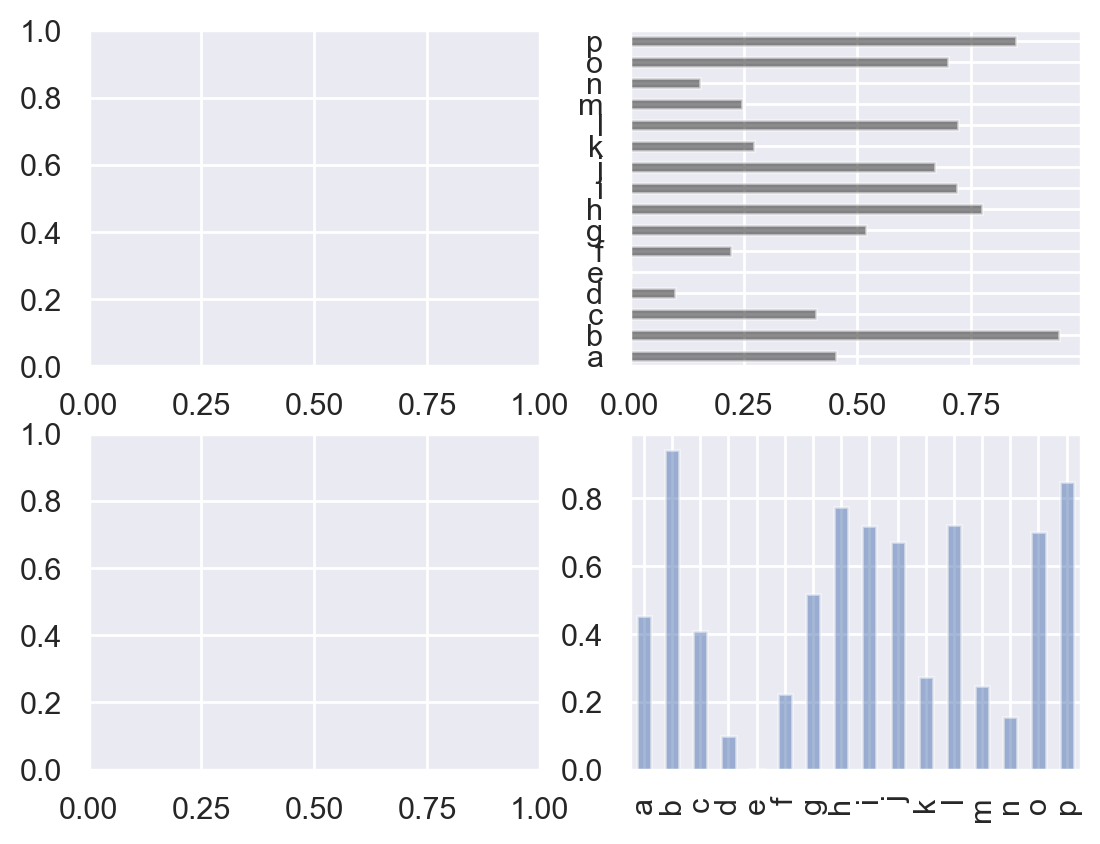

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2)  # 此处是一个2*2的图
 
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
 
data.plot.bar(ax=axes[1,1], color='b', alpha=0.5)  # ax=[1,1] 即位置是第2行、第二列。（python从0开始计数，所以“1”代表第2的）
data.plot.barh(ax=axes[0,1], color='k', alpha=0.5) # alpha：设定图表的透明度
 
plt.show()

### 怎么把多个子图一起合并到一个图上？

最主要的一点是让多个图线共用一个x坐标轴。

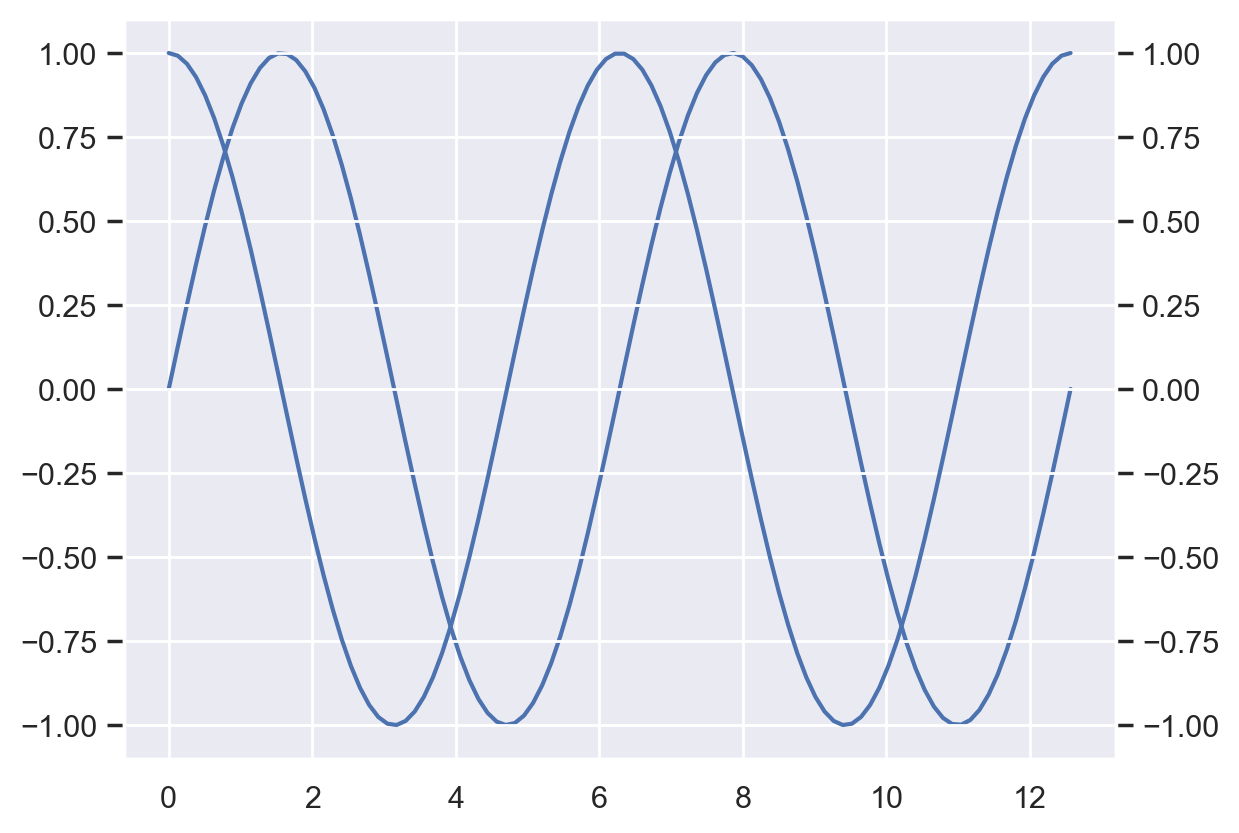

In [59]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, ax1 = plt.subplots(1, 1)             # 做1*1个子图，等价于 " fig, ax1 = plt.subplot() "，等价于 " fig, ax1 = plt.subplots() "
 
ax2 = ax1.twinx()                         # 让2个子图的x轴一样，同时创建副坐标轴。
 
# 作y=sin(x)函数
x1 = np.linspace(0, 4 * np.pi, 100)
y1 = np.sin(x1)
ax1.plot(x1, y1)
 
#  作y = cos(x)函数
x2 = np.linspace(0, 4 * np.pi, 100)       # 表示在区间[0, 4π]之间取100个点（作为横坐标，“线段是有无数多个点组成的”）。
y2 = np.cos(x2)
ax2.plot(x2, y2)
 
plt.show()
#plt.savefig('sin_cos_2.png')               # 将窗口另存为png格式图片

## subplots_adjust

`subplots_adjust(self, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`

left, right, bottom, top：子图所在区域的边界。

当值大于1.0的时候子图会超出figure的边界从而显示不全；值不大于1.0的时候，子图会自动分布在一个矩形区域（下图灰色部分）。
要保证left < right, bottom < top，否则会报错。
如下图：
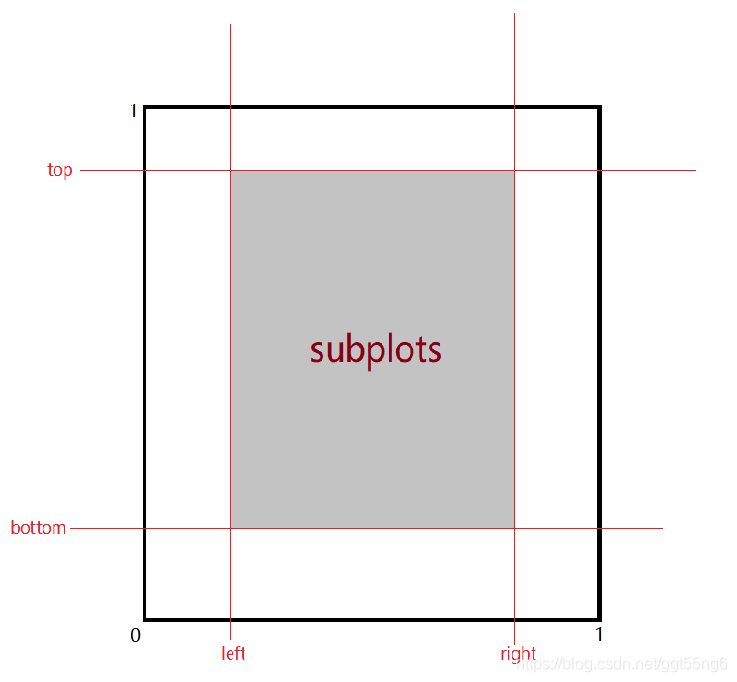

## 细节设置

### ax.tick_params()
ax.tick_params(axis=‘x’, tickdir=‘in’, labelrotation=20)

可以写成plt.tick_params(axis=‘both’, \**kwargs)， 也可以通过ax = plt.gca() ，写成ax.tick_params(axis=‘both’, \**kwargs)

matplotlib.pyplot.tick_params参数:
- axis : 可选{‘x’, ‘y’, ‘both’} ，选择对哪个轴操作，默认是’both’
- reset : bool，如果为True，则在处理其他参数之前将所有参数设置为默认值。 它的默认值为False。
- which : 可选{‘major’, ‘minor’, ‘both’} 选择对主or副坐标轴进行操作
- direction/tickdir : 可选{‘in’, ‘out’, ‘inout’}刻度线的方向
- size/length : float, 刻度线的长度
- width : float, 刻度线的宽度
- color : 刻度线的颜色，我一般用16进制字符串表示，eg：’#EE6363’
- pad : float, 刻度线与刻度值之间的距离
- labelsize : float/str, 刻度值字体大小
- labelcolor : 刻度值颜色
- colors : 同时设置刻度线和刻度值的颜色
- zorder : float ，Tick and label zorder.
- bottom, top, left, right : bool, 分别表示上下左右四边，是否显示刻度线，True为显示
- labelbottom, labeltop, labelleft, labelright :bool, 分别表示上下左右四边，是否显示刻度值，True为显示
- labelrotation : 刻度值逆时针旋转给定的度数，如20
- gridOn: bool ,是否添加网格线； grid_alpha:float网格线透明度 ； grid_color: 网格线颜色; grid_linewidth:float网格线宽度； grid_linestyle: 网格线型
- tick1On, tick2On : bool分别表表示是否显示axis轴的(左/下、右/上)or(主、副)刻度线
- label1On,label2On : bool分别表表示是否显示axis轴的(左/下、右/上)or(主、副)刻度值

### 坐标轴标题设置:x/ylabel

xlabel 中常用的一些参数：

- fontsize : 设置字体大小，默认12，可选参数 ['xx-small', 'x-small', 'small', 'medium', 'large','x-large', 'xx-large']
- fontweight : 设置字体粗细，可选参数 ['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
- fontstyle : 设置字体类型，可选参数[ 'normal' | 'italic' | 'oblique' ]，italic斜体，oblique倾斜
- verticalalignment : 设置水平对齐方式 ，可选参数 ： 'center' , 'top' , 'bottom' ,'baseline'
- horizontalalignment : 设置垂直对齐方式，可选参数：left,right,center
- rotation : (旋转角度)可选参数为:vertical,horizontal 也可以为数字
- alpha : 透明度，参数值0至1之间
- backgroundcolor : 标题背景颜色
- bbox : 给标题增加外框 ，常用参数如下：
    - boxstyle 方框外形
    - facecolor (简写fc)背景颜色
    - edgecolor (简写ec)边框线条颜色
    - edgewidth 边框线条大小

### 坐标轴刻度设置 

默认坐标轴是显示` x y `的值，但是也可以自定义显示不同的刻度，这里需要使用到的函数为 `xticks` 和 `yticks` 两个函数：

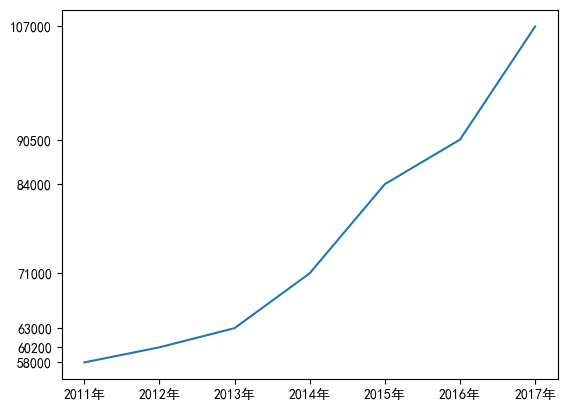

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']

x_data = [2011,2012,2013,2014,2015,2016,2017]
y_data = [58000,60200,63000,71000,84000,90500,107000]

plt.xticks(x_data, ['2011年','2012年','2013年','2014年','2015年','2016年','2017年'])
plt.yticks(y_data)

plt.plot(x_data, y_data)

plt.show()

有些时候，由于数据脱敏的需要，我们不要显示刻度，还可以这么写：

- `plt.xticks(x_data, [])`
- `plt.yticks(y_data, [])`

直接关闭坐标轴：`plt.axis("off")`

### 坐标轴范围设置x/ylim

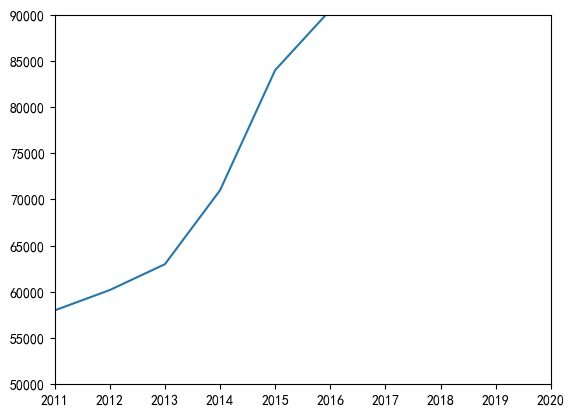

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']

x_data = [2011,2012,2013,2014,2015,2016,2017]
y_data = [58000,60200,63000,71000,84000,90500,107000]
plt.xlim(2011, 2020)
plt.ylim(50000, 90000)

plt.plot(x_data, y_data)

plt.show()

这里设置在 Y 轴上最大值为 90000 ，那么 2016 和 2017 对应的数据将会无法显示，实际我们从得出的结果图上也能看出这一点。

### 网格线设置

网格线默认是关闭的，我们可以通过函数` grid `修改参数` b `来开启网格线，如下：

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20012\3852207925.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


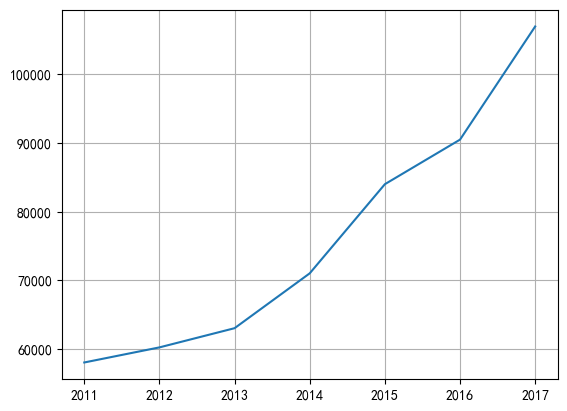

In [4]:
plt.rcParams['font.sans-serif']=['SimHei']

x_data = [2011,2012,2013,2014,2015,2016,2017]
y_data = [58000,60200,63000,71000,84000,90500,107000]

plt.plot(x_data, y_data)

plt.grid(b=True)

plt.show()

我们不仅可开启网格线，还可以通过参数 `axis` 来控制是开启哪个轴的网格线：
- #开启 x 轴网格线
plt.grid(b=True, axis='x')
- #开启 y 轴网格线
plt.grid(b=True, axis='y')

### 图例设置

图例能对图表起到注释的作用，我们可以通过参数 `label `对该图表的图例进行设置，示例如下：

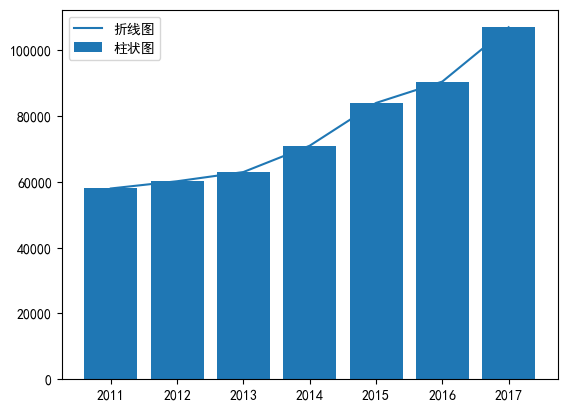

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']

x_data = [2011,2012,2013,2014,2015,2016,2017]
y_data = [58000,60200,63000,71000,84000,90500,107000]

plt.plot(x_data, y_data, label = '折线图')
plt.bar(x_data, y_data, label = '柱状图')

plt.legend()

plt.show()

### 图表标题设置

`plt.title(label='xxx 公司 xxx 产品销量')`

# seaborn

## sns.heatmap

`seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt=’.2g’, annotkws=None, linewidths=0, linecolor=‘white’, cbar=True, cbarkws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)`


- `vmin,vmax`：用于指定图例中最小值与最大值的显示值

- `cmap`：指定一个colormap对象，用于热力图的填充色

- `center`：指定颜色中心值，通过该参数可以调整热力图的颜色深浅

- `annot`：指定一个bool类型的值或与data参数形状一样的数组，如果为True，就在热力图的每个单元上显示数值

- `fmt`：指定单元格中数据的显示格式

- `annot_kws`：有关单元格中数值标签的其他属性描述，如颜色、大小等

- `linewidths `：指定每个单元格的边框宽度

- `linecolor`：指定每个单元格的边框颜色

- `cbar`：bool类型参数，是否用颜色条作为图例，默认为True

- `square`：bool类型参数，是否使热力图的每个单元格为正方形，默认为False

- `cbar_kws`：有关颜色条的其他属性描述

- `xticklabels,yticklabels`：指定热力图x轴和y轴的刻度标签，如果为True，则分别以数据框的变量名和行名称作为刻度标签

- `mask`：用于突出显示某些数据

- `ax`：用于指定子图的位置

具体详见https://zhuanlan.zhihu.com/p/96040773?from_voters_page=true

## sns.pairplot

`pairplot`中pair是成对的意思，pairplot主要展现的是变量两两之间的关系（线性或非线性，有无较为明显的相关关系）

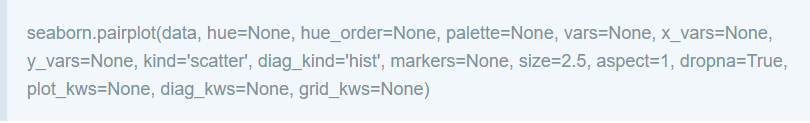

- `kind`：用于控制非对角线上的图的类型，可选"scatter"与"reg":将 `kind` 参数设置为 "reg" 会为非对角线上的散点图拟合出一条回归直线，更直观地显示变量之间的关系。
- `diag_kind`：控制对角线上的图的类型，可选"hist"与"kde"
- `hue` ：针对某一字段进行分类
- `markers`：控制散点的样式:markers=["+", "s", "D"]
- `vars,x_vars,y_vars`：选择数据中的特定字段，以list形式传入
- `plot_kws`：用于控制非对角线上的图的样式
- `diag_kws`：用于控制对角线上图的样式

具体详见https://zhuanlan.zhihu.com/p/98729226

## sns.countplot

sns.countplot() 用于画类别特征的频数条形图。

`sns.countplot(x=None, y=None, hue=None, data=None, order=None,
hue_order=None, orient=None, color=None, palette=None,
saturation=0.75, dodge=True, ax=None, **kwargs)`

参数说明：

x： x轴上的条形图，以x标签划分统计个数

y：y轴上的条形图，以y标签划分统计个数

hue：在x或y标签划分的同时，再以hue标签划分统计个数

data：df或array或array列表，用于绘图的数据集，x或y缺失时，data参数为数据集，同时x或y不可缺少，必须要有其中一个

order与 hue_order：分别是对x或y的字段排序，或是对hue的字段排序。排序的方式为列表

orient：强制定向，v:竖直方向；h:水平方向

palette：使用不同的调色板

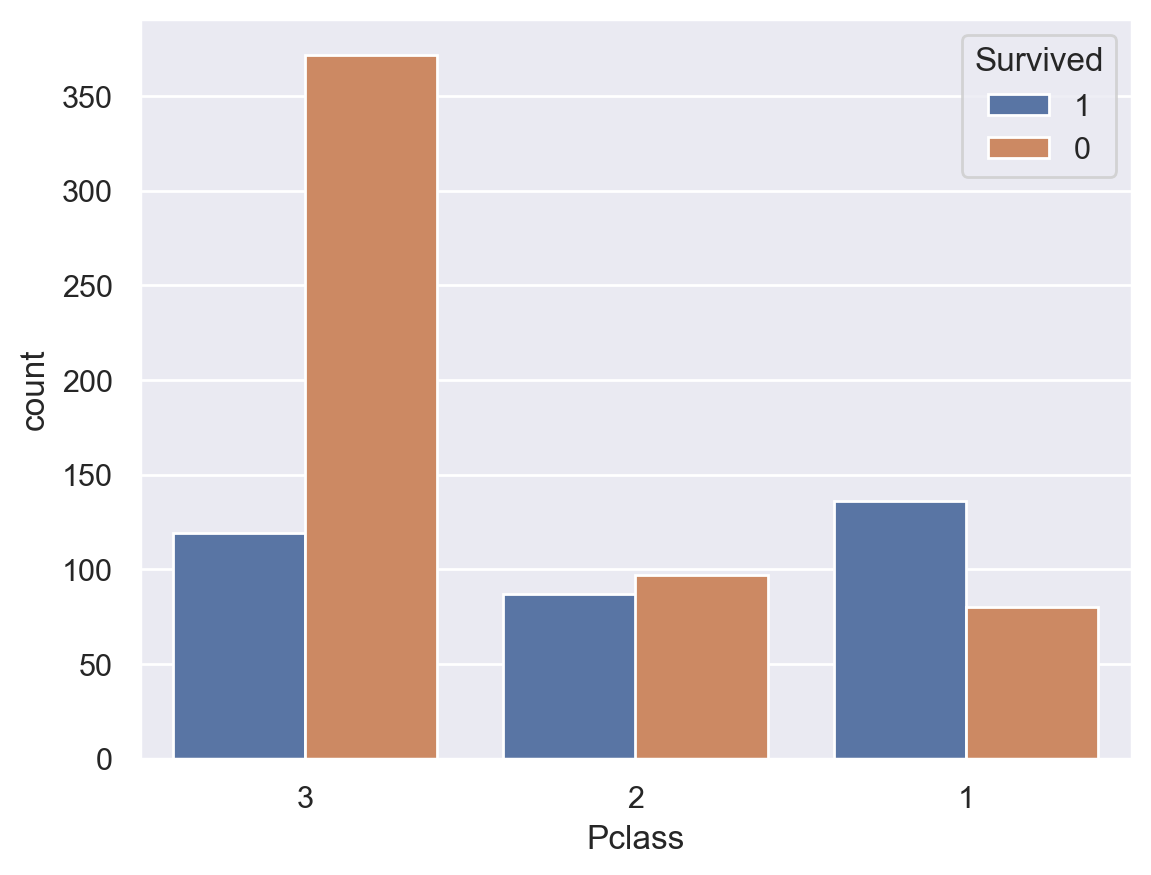

In [55]:
titanic = pd.read_csv('titanic_train.csv')
sns.countplot(x='Pclass',hue='Survived',data=titanic,order=[3,2,1],hue_order=[1,0])
plt.show()

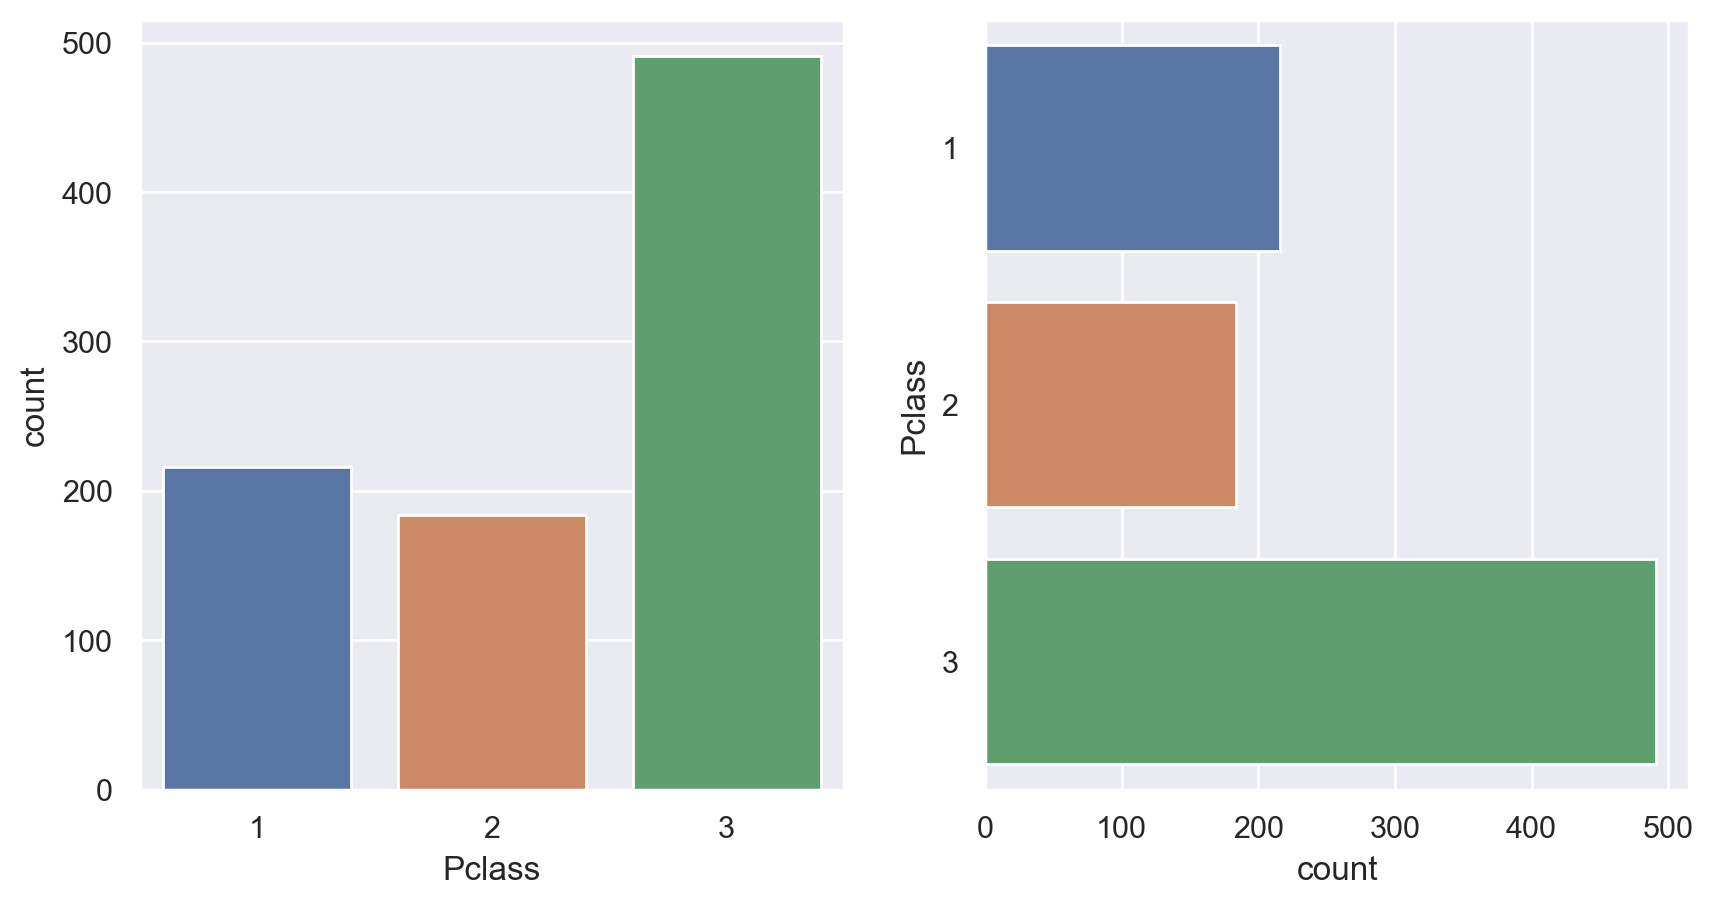

In [56]:
#ax指定子图
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='Pclass', data=titanic, ax=ax[0])
sns.countplot(y='Pclass', data=titanic, ax=ax[1])
plt.show()

## sns.distplot

sns.distplot:直方图（hist）+内核密度函数（kde）

seaborn.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)

关键参数：
- norm_hist：若为True, 则直方图高度显示密度而非计数(含有kde图像中默认为True)。
- **当kde与norm_hist皆为Fasle时，它的plot与matplotlib.pyplot.hist是一模一样的。表现频次。**
- rug=True,绘制变量分布情况。
- kde=True,#开启核密度曲线kernel density estimate (KDE)
- kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'}设置外框线属性  

### 核密度函数Kernel Density Estimation(KDE)
https://blog.csdn.net/weixin_39910711/article/details/107307509

- 核密度估计（kernel density estimation）是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。
- 反映出离散测量值在连续区域内的分布情况。
- 密度估计最简单的非参数技术是直方图。
- sns.distplot：y轴表示密度，每个直方图的面积代表概率。
https://www.cnblogs.com/tangjianwei/p/13753633.html
- 绘制KDE图比绘制直方图要复杂得多，每个观测值首先要以该值为中心的正(高斯)曲线代替。然后各个点在加起来，计算支持网格点中每个点的密度值，然后将得到的曲线归一化，使其面积小于1，即得到核密度估计图.

## sns.FacetGrid

FacetGrid类有助于使用多个面板分别在数据集的子集内可视化一个变量的分布以及多个变量之间的关系。一个FacetGrid可以与多达三个维度可以得出：`row，col`，和`hue`。前两个与得到的轴阵列有明显的对应关系; 将色调变量视为沿深度轴的第三个维度，其中不同的级别用不同的颜色绘制。

`sns.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)`

- data：处理后的（“长格式”）dataframe数据
- row, col, hue : strings 也就是行列，分组:例如：col="sex", hue="smoker",即列表示性别，颜色语意表示是否吸烟
- col_wrap : int，画布可以分为多少列

基本工作流程是`FacetGrid`使用数据集和用于构造网格的变量初始化对象。然后，可以通过调用`FacetGrid.map()`或将一个或多个绘图函数应用于每个子集 `FacetGrid.map_dataframe()`。最后，可以使用其他方法调整绘图，以执行更改轴标签，使用不同刻度或添加图例等操作.

seaborn可直接将绘图结构链接到数据集的结构。要使用这些功能，您的数据必须位于`Pandas DataFrame`中，并且必须采用Hadley Whickam称之为“整洁”数据的形式。简而言之，这意味着您的数据框应该构造成**每列都是一个变量，每一行都是一个观察点。(长表格)**

具体查看https://blog.csdn.net/weixin_42398658/article/details/82960379

## sns.set 绘图风格设置

`seaborn.set(context=‘notebook’, 
            style=‘darkgrid’, 
            palette=‘deep’, 
            font=‘sans-serif’, 
            font_scale=1, 
            color_codes=True, 
            rc=None)`
            
可以设置背景色、风格、字型、字体等，style可选参数值有：darkgrid，whitegrid，dark，white，ticks

### with——打开某种风格

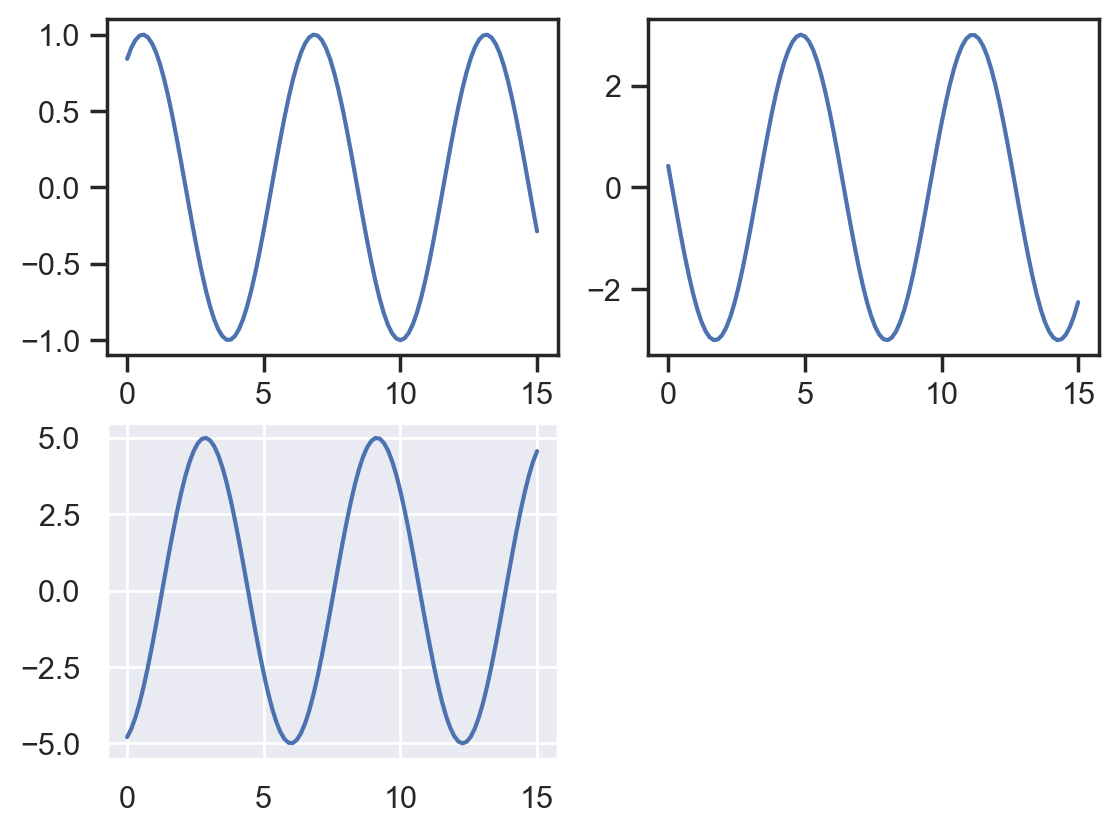

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
x = np.linspace(0, 15, 100)
y1 = np.sin(x + 1) * 1
y2 = np.sin(x + 3) * 3  
y3 = np.sin(x + 5) * 5  

fig = plt.figure()

with sns.axes_style("ticks"):
    ax1 = fig.add_subplot(221)
    plt.plot(x, y1)
    ax1 = fig.add_subplot(222)
    plt.plot(x, y2)
    
fig.add_subplot(223)
plt.plot(x, y3)

## sns.despine() 函数

移除图像的上部和右侧的坐标轴

`seaborn.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)`

# Sklearn

## KFold

我们想要将原始数据分割为训练集和测试集，但是会有一些问题，比如，过渡拟合（a risk of overfittingon the test set）

其中一个方法是，再拆分出来一个验证集，先用训练集训练模型，然后使用验证集来校验，最后去测试集，但是这个方法很明显的问题是，大大减少了训练集的样本数。

另一种比较好的方案就是cross-validation (CV for short)，**交叉验证**。基本的思路是：**k-fold CV**，也就是我们下面要用到的函数KFold，是把原始数据分割为K个子集，每次会将其中一个子集作为测试集，其余K-1个子集作为训练集。

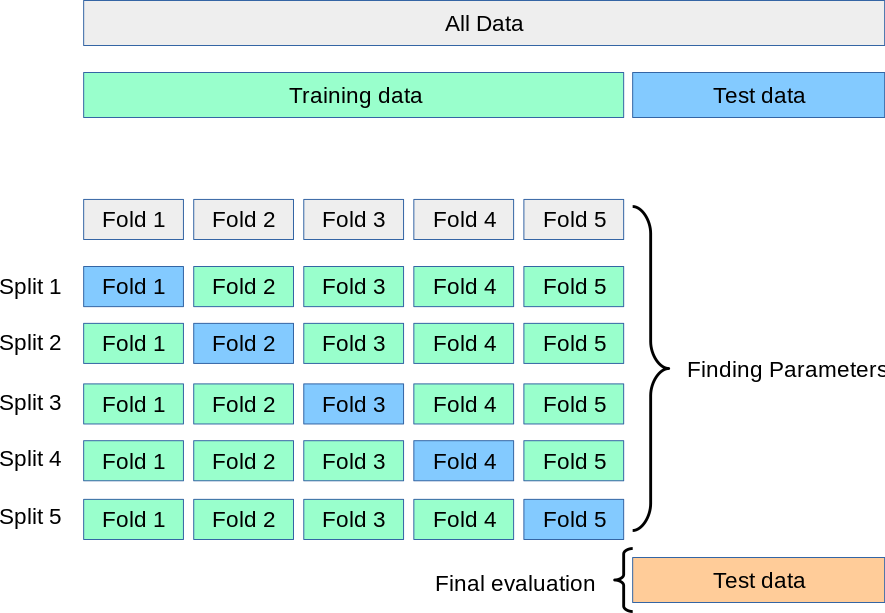

`sklearn.model_selection.KFold(n_splits=5,*,shuffle=False,random_state=None)`
- `shuffle`:是否打乱数据
- `random_state`:随机状态，需要配合`shuffle`参数使用

具体详见https://sklearn.apachecn.org/#/docs/master/30

## 数据集划分函数StratifiedShuffleSplit的使用

### 交叉验证

交叉验证是指在给定的建模样本中，拿出其中的大部分样本进行模型训练，生成模型，留小部分样本用刚建立的模型进行预测，并求这小部分样本的预测误差，记录它们的平方加和。这个过程一直进行，直到所有的样本都被预测了一次而且仅被预测一次，比较每组的预测误差，选取误差最小的那一组作为训练模型。

### StratifiedShuffleSplit函数的使用

`from  sklearn.model_selection import StratifiedShuffleSplit
StratifiedShuffleSplit(n_splits=10,test_size=None,train_size=None, random_state=None)`

1. 参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10

2. 参数test_size和train_size是用来设置train/test对中train和test所占的比例。例如：
- 1.提供10个数据num进行训练和测试集划分
- 2.设置train_size=0.8 test_size=0.2
- 3.train_num=num*train_size=8 test_num=num*test_size=2
- 4.即10个数据，进行划分以后8个是训练数据，2个是测试数据

注*：train_num≥2，test_num≥2 ;test_size+train_size可以小于1*

3. 参数 random_state控制是将样本随机打乱

## sklearn score()

python机器学习sklearn里的score()方法，主要用于度量给定测试集的预测效果的好坏。

当y为连续变量时，score的取值为$R^2$；当y为分类变量时，score的取值为准确率`accuracy`。

其中：

- $R^2 =（1-u/v）$,
- u=((y_true - y_pred) ** 2).sum(),
- v=((y_true - y_true.mean()) ** 2).sum()；

accuracy=分类算法正确的分类数/总分类数。

# 集成学习

集成学习归属于机器学习，他是一种「训练思路」，并不是某种具体的方法或者算法。现实生活中，大家都知道「人多力量大」，「3 个臭皮匠顶个诸葛亮」。而集成学习的核心思路就是「人多力量大」，它并没有创造出新的算法，而是把已有的算法进行结合，从而得到更好的效果。

在机器学习的有监督学习算法中，我们的目标是学习出一个稳定的且在各个方面表现都较好的模型，但实际情况往往不这么理想，有时我们只能得到多个有偏好的模型（弱监督模型，在某些方面表现的比较好）。集成学习就是组合这里的多个弱监督模型以期得到一个更好更全面的强监督模型，集成学习潜在的思想是即便某一个弱分类器得到了错误的预测，其他的弱分类器也可以将错误纠正回来。集成学习在各个规模的数据集上都有很好的策略。
- 数据集大：划分成多个小数据集，学习多个模型进行组合
- 数据集小：利用Bootstrap方法进行抽样，得到多个数据集，分别训练多个模型再进行组合

## Bagging

Bagging是bootstrap aggregating的简写。先说一下bootstrap，**bootstrap**也称为自助法，它是一种有放回的抽样方法，目的为了得到统计量的分布以及置信区间。具体步骤如下

- 采用重抽样方法（有放回抽样）从原始样本中抽取一定数量的样本
- 根据抽出的样本计算想要得到的统计量T
- 重复上述N次（一般大于1000），得到N个统计量T
- 根据这N个统计量，即可计算出统计量的置信区间

在Bagging方法中，利用bootstrap方法从整体数据集中采取有放回抽样得到N个数据集，在每个数据集上学习出一个模型，最后的预测结果利用N个模型的输出得到，具体地：**分类问题采用N个模型预测投票的方式，回归问题采用N个模型预测平均的方式。**

例如**随机森林（Random Forest）** 就属于Bagging。随机森林简单地来说就是用随机的方式建立一个森林，森林由很多的决策树组成，随机森林的每一棵决策树之间是没有关联的。

在我们学习每一棵决策树的时候就需要用到Bootstrap方法。在随机森林中，**有两个随机采样的过程：对输入数据的行（数据的数量）与列（数据的特征）都进行采样。** 对于行采样，采用有放回的方式，若有N个数据，则采样出N个数据（可能有重复），这样在训练的时候每一棵树都不是全部的样本，相对而言不容易出现overfitting；接着进行列采样从M个feature中选择出m个（m<<M）。最后进行决策树的学习。

预测的时候，随机森林中的每一棵树的都对输入进行预测，最后进行投票，哪个类别多，输入样本就属于哪个类别。这就相当于前面说的，每一个分类器（每一棵树）都比较弱，但组合到一起（投票）就比较强了。

## Boosting

**提升方法（Boosting）是一种可以用来减小监督学习中偏差的机器学习算法**。主要也是学习一系列弱分类器，并将其组合为一个强分类器。Boosting中有代表性的是**AdaBoost（Adaptive boosting）算法**：刚开始训练时对每一个训练例赋相等的权重，然后用该算法对训练集训练t轮，每次训练后，对训练失败的训练例赋以较大的权重，也就是让学习算法在每次学习以后更注意学错的样本，从而得到多个预测函数。具体可以参考《统计学习方法》。

**GBDT（Gradient Boost Decision Tree)** 也是一种Boosting的方法，与**AdaBoost**不同，GBDT每一次的计算是为了减少上一次的残差，GBDT在残差减少（负梯度）的方向上建立一个新的模型。

## Bagging和Boosting区别
Bagging和Boosting采用的都是**采样-学习-组合**的方式，但在细节上有一些不同，如
- Bagging中每个训练集互不相关，也就是每个基分类器互不相关，而Boosting中训练集要在上一轮的结果上进行调整，也使得其不能并行计算
- Bagging中预测函数是均匀平等的，但在Boosting中预测函数是加权的

在算法学习的时候，通常在bias和variance之间要有一个权衡。bias与variance的关系如下图，因而模型要想达到最优的效果，必须要兼顾bias和variance，也就是要采取策略使得两者比较平衡。
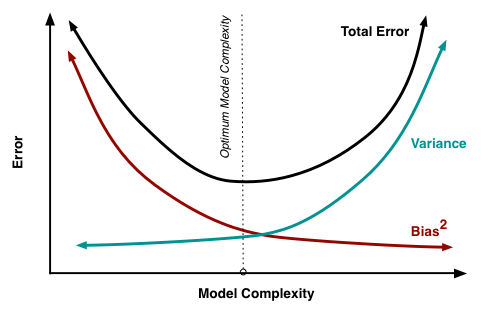
从算法来看，Bagging关注的是多个基模型的投票组合，保证了模型的稳定，因而每一个基模型就要相对复杂一些以降低偏差（比如每一棵决策树都很深）；而Boosting采用的策略是在每一次学习中都减少上一轮的偏差，因而在保证了偏差的基础上就要将每一个基分类器简化使得方差更小。

## Stacking

**Stacking方法是指训练一个模型用于组合其他各个模型。** 首先我们先训练多个不同的模型，然后把之前训练的各个模型的输出为输入来训练一个模型，以得到一个最终的输出。理论上，Stacking可以表示上面提到的两种Ensemble方法，只要我们采用合适的模型组合策略即可。*但在实际中，我们通常使用logistic回归作为组合策略。*

如下图，先在整个训练数据集上通过bootstrap抽样得到各个训练集合，得到一系列分类模型，称之为Tier 1分类器（可以采用交叉验证的方式学习），然后将输出用于训练Tier 2 分类器。潜在的一个思想是希望训练数据都得被正确的学习到了。比如某个分类器错误的学习到了特征空间里某个特定区域，因此错误分类就会来自这个区域，但是Tier 2分类器可能根据其他的分类器学习到正确的分类。**交叉验证也通常用于训练Tier 1分类器**：把这个训练集合分成T个块，Tier 1中的每个分类器根据各自余下的T-1块进行训练，并在T块（该块数据并未用于训练）上测试。之后将这些分类器的输出作为输入，在整个训练集合上训练Tier 2分类器。（这里未提及测试集，测试集是指不在任何训练过程中出现的数据）。

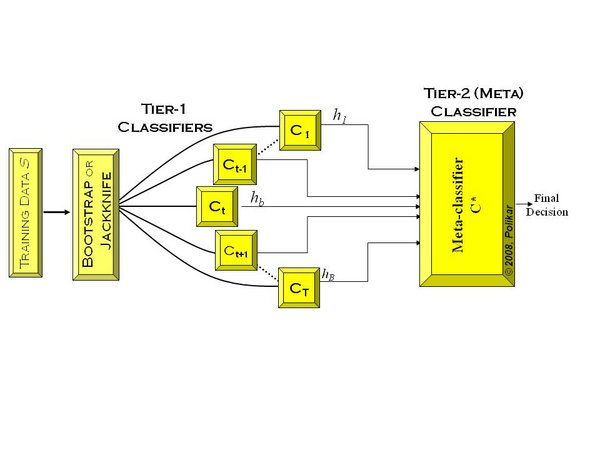

**具体参考**
- https://link.zhihu.com/?target=http%3A//www.datakit.cn/blog/2014/11/02/Ensemble_learning.html
- https://easyai.tech/ai-definition/ensemble-learning/